<h3> AIML LAB SEE</h3>

### 8 Puzzle using A*  

In [12]:
import heapq

goal = [[1,2,3],[4,5,6],[7,8,0]]
moves = [(-1,0),(1,0),(0,-1),(0,1)]

def h(state):
    return sum(abs((v-1)//3 - i) + abs((v-1)%3 - j)
               for i in range(3) for j in range(3) if (v := state[i][j]))

def neighbors(state):
    x, y = next((i,j) for i in range(3) for j in range(3) if state[i][j]==0)
    for dx,dy in moves:
        nx, ny = x+dx, y+dy
        if 0<=nx<3 and 0<=ny<3:
            new = [row[:] for row in state]
            new[x][y], new[nx][ny] = new[nx][ny], new[x][y]
            yield new

def astar(start):
    start_t = tuple(map(tuple, start))
    goal_t = tuple(map(tuple, goal))
    seen = {start_t: 0}
    pq = [(h(start), 0, start, [])]
    while pq:
        _, g, state, path = heapq.heappop(pq)
        state_t = tuple(map(tuple, state))
        if state_t == goal_t: return path + [state]
        for nb in neighbors(state):
            nb_t = tuple(map(tuple, nb))
            if nb_t not in seen or g+1 < seen[nb_t]:
                seen[nb_t] = g+1
                heapq.heappush(pq, (g+1 + h(nb), g+1, nb, path + [state]))
    return None

def print_path(path):
    for p in path:
        for r in p: print(r)
        print()

# Example
start = [[1,2,3],[0,4,6],[7,5,8]]
solution = astar(start)

if solution:
    print(f"Moves: {len(solution)-1}")
    print_path(solution)
else:
    print("No solution found (puzzle might be unsolvable).")

Moves: 3
[1, 2, 3]
[0, 4, 6]
[7, 5, 8]

[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



### K Means Clustering Scratch

Centroids: [[2.  5. ]
 [4.5 6.5]
 [6.5 2.5]]
Cluster 1: 2 points, [array([2, 4]), array([2, 6])]
Cluster 2: 2 points, [array([5, 6]), array([4, 7])]
Cluster 3: 2 points, [array([8, 3]), array([5, 2])]


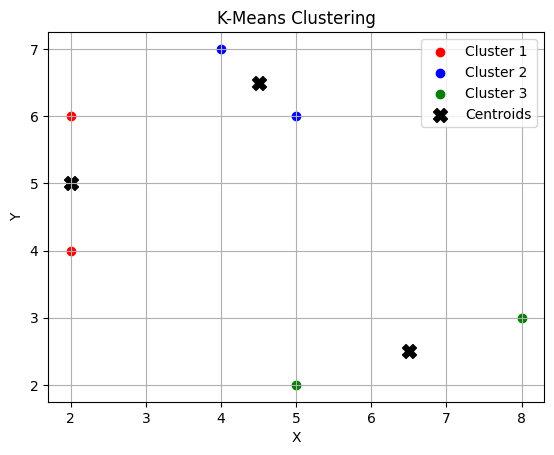

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def k_means(X, k, max_iters=100):
    centroids = np.array([[2, 4],[5,6], [8, 3]])  # Manually set initial centroids
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            clusters[np.argmin(distances)].append(point)

        new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        if np.allclose(centroids, new_centroids): break
        centroids = np.array(new_centroids)
    
    return centroids, clusters

# Running K-Means
X = np.array([[2,4], [2, 6], [5,6], [4,7], [8, 3], [5,2]])
k = 3
centroids, clusters = k_means(X, k)

# Final Results
print("Centroids:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {len(cluster)} points, {cluster}")
    
colors = ['red', 'blue', 'green']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(*cluster.T, c=colors[i], label=f'Cluster {i+1}')
    
plt.scatter(*centroids.T, c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.grid(True)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Centroids:
 [[2.5 2.5]
 [8.5 8.5]
 [6.5 6.5]]
Labels: [0 0 1 1 0 2 0 2]


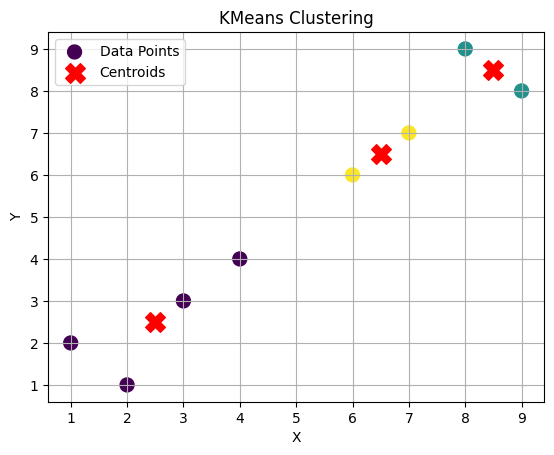

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array([[1, 2], [2, 1], [8, 9], [9, 8], [3, 3], [7, 7], [4, 4], [6, 6]])

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')  # Avoid deprecation warning
kmeans.fit(X)

print("Centroids:\n", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)

plt.scatter(*X.T, c=kmeans.labels_, s=100, label='Data Points')
plt.scatter(*kmeans.cluster_centers_.T, c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.title('KMeans Clustering')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
#cmap='viridis',


Slope: 9449.962321455076
Intercept: 25792.200198668696
R^2: 0.9569566641435086
Best Fit: y = 9449.96x + 25792.20


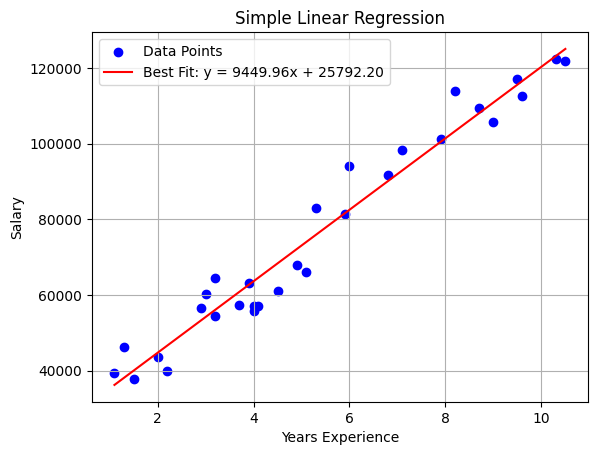

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Datasets/logistic_Salary_Data.csv")
x = data["YearsExperience"]
y = data["Salary"]
n = len(x)

xMean = sum(x) / n
yMean = sum(y) / n

dx = x - xMean
dy = y - yMean

d = dx * dy
dx2 = dx * dx
dy2 = dy * dy

m = sum(d) / sum(dx2)
c = yMean - m * xMean

yp = m * x + c

r2 = 1 - (sum((y - yp) ** 2) / sum(dy2))

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')

print(f'Slope: {m}')
print(f'Intercept: {c}')
print(f'R^2: {r2}')
print(f'Best Fit: y = {m:.2f}x + {c:.2f}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {m:.2f}x + {c:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

Slope: 9449.962321455074
Intercept: 25792.20019866871


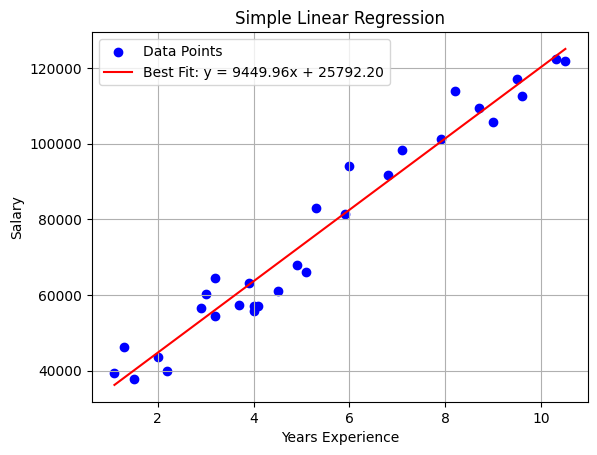

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("Datasets/logistic_Salary_Data.csv")
x = data[["YearsExperience"]]
y = data["Salary"]

model = LinearRegression()
model.fit(x, y)

yp = model.predict(x)

slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {slope:.2f}x + {intercept:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

#### MULTI LR

Petrol_tax: -52.75
Average_income: -0.05
Intercept: 1179.17


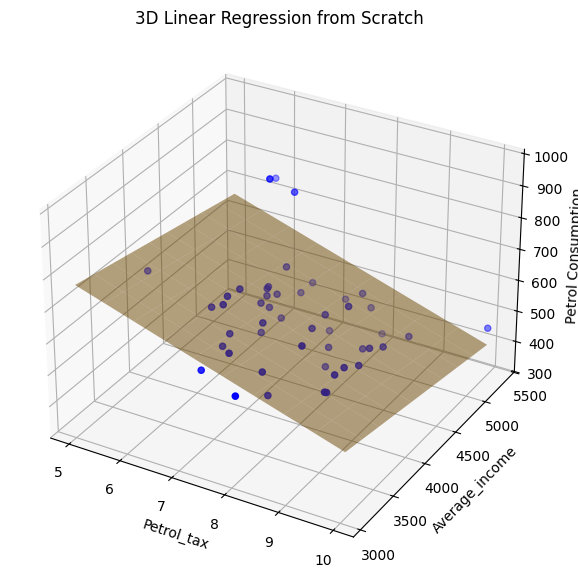

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
data = pd.read_csv("Datasets/petrol_consumption.csv")

# Pick 2 features for 3D visualization
features = ["Petrol_tax", "Average_income"]
x = data[features]
y = data["Petrol_Consumption"]

# Add intercept column manually
X = np.c_[np.ones(x.shape[0]), x]

# Compute coefficients: beta = (XᵀX)^(-1)Xᵀy
beta = np.linalg.inv(X.T @ X) @ X.T @ y
intercept = beta[0]
slopes = beta[1:]

# Print coefficients
for name, coef in zip(features, slopes):
    print(f"{name}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

# Prepare grid for surface
x1_range = np.linspace(x[features[0]].min(), x[features[0]].max(), 10)
x2_range = np.linspace(x[features[1]].min(), x[features[1]].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predicted y values (Z) from regression plane
y_grid = intercept + slopes[0]*x1_grid + slopes[1]*x2_grid

# Plotting 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual data as scatter
ax.scatter(x[features[0]], x[features[1]], y, color='blue', label="Actual")

# Regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='orange', label="Regression Plane")

# Axis labels
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Petrol Consumption")
ax.set_title("3D Linear Regression from Scratch")

plt.show()


Petrol_tax: -52.75
Average_income: -0.05
Intercept: 1179.17


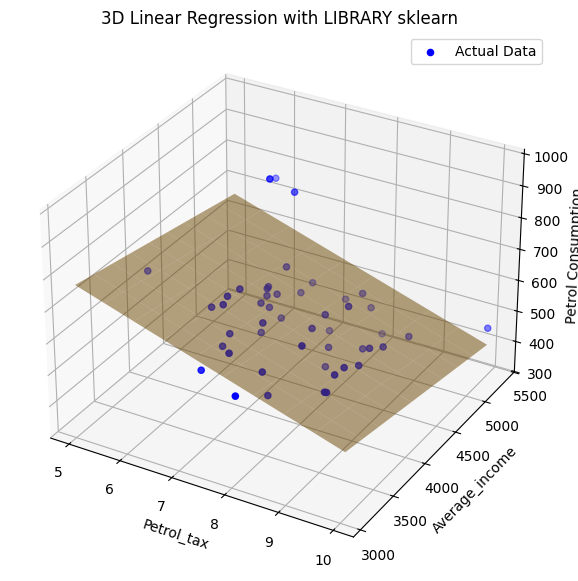

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv("Datasets/petrol_consumption.csv")

features = ["Petrol_tax", "Average_income"]
X = data[features]
y = data["Petrol_Consumption"]


model = LinearRegression()
model.fit(X, y)


for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Create a grid of values
x1_range = np.linspace(X[features[0]].min(), X[features[0]].max(), 10)
x2_range = np.linspace(X[features[1]].min(), X[features[1]].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict Z values (regression surface)
z_grid = model.intercept_ + model.coef_[0]*x1_grid + model.coef_[1]*x2_grid

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X[features[0]], X[features[1]], y, color='blue', label='Actual Data')

# Plot regression surface
ax.plot_surface(x1_grid, x2_grid, z_grid, alpha=0.5, color='orange')

# Labels
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Petrol Consumption")
ax.set_title("3D Linear Regression with LIBRARY sklearn")
plt.legend()
plt.show()


#### KNN

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets/iris.csv")
df = df.drop(columns=['Id'])

k = 5
test = np.array([6.1, 3.0, 2.4, 1])

data = df.iloc[:, :-1]
distance = np.sqrt(((data - test) ** 2).sum(axis=1))
df["Distance"] = distance

k_nearest = df.nsmallest(k, "Distance")["Species"]
print("Predicted Class:", k_nearest.mode()[0])

Predicted Class: Iris-versicolor


In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Datasets/iris.csv")
df = df.drop(columns=['Id'])

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

test = np.array([[6.1, 3.0, 2.4, 1]])

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)

predicted_class = knn.predict(test)
print("Predicted Class:", label_encoder.inverse_transform(predicted_class)[0])

Predicted Class: Iris-versicolor


#### Decision Tree

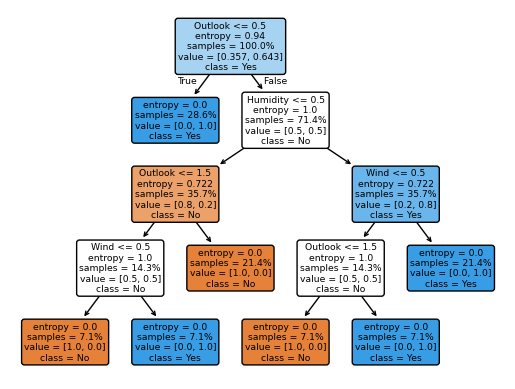

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("Datasets/tennis.csv")
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
x = df.iloc[:,:-1]
y = df["Play"]
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x, y)
plt = plot_tree(clf, feature_names=df.columns, class_names=["No", "Yes"], proportion=True,rounded=True, filled=True)


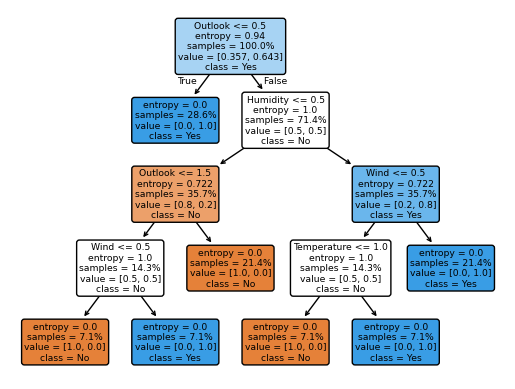

The predicted decision for the sample is: Yes


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Datasets/tennis.csv")

# Encode categorical features using separate LabelEncoders for each column
encoders = {}
for col in df.columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Split features and target
x = df.iloc[:, :-1]
y = df["Play"]

# Train the decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=x.columns, class_names=encoders["Play"].classes_, proportion=True, rounded=True, filled=True)
plt.show()

# Create a sample input
sample = pd.DataFrame([["Sunny", "Mild", "Normal", "Weak"]], columns=x.columns)

# Encode the sample using the same encoders
for col in sample.columns:
    sample[col] = encoders[col].transform(sample[col])

# Predict and decode the result
predicted = encoders["Play"].inverse_transform(clf.predict(sample))
print(f"The predicted decision for the sample is: {predicted[0]}")


#### NAIVE BAYERS 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temp": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)

le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=["Play"])
y = df["Play"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes classifier: {accuracy * 100:.2f}%")

Accuracy of Naive Bayes classifier: 60.00%


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv("Datasets/tennis.csv")  # or use the hardcoded DataFrame if needed

# Encode categorical features
le = LabelEncoder()
X = data.drop("Play", axis=1).apply(le.fit_transform)
y = le.fit_transform(data["Play"])

# Train decision tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X, y)

# Export the tree
f = data.columns[:-1]
tree_rules = export_text(clf, feature_names=list(f))
print(tree_rules)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



Centroids:
 [[2.  5. ]
 [4.5 6.5]
 [6.5 2.5]]
Cluster 1: 2 points: [array([2, 4]), array([2, 6])]
Cluster 2: 2 points: [array([5, 6]), array([4, 7])]
Cluster 3: 2 points: [array([8, 3]), array([5, 2])]


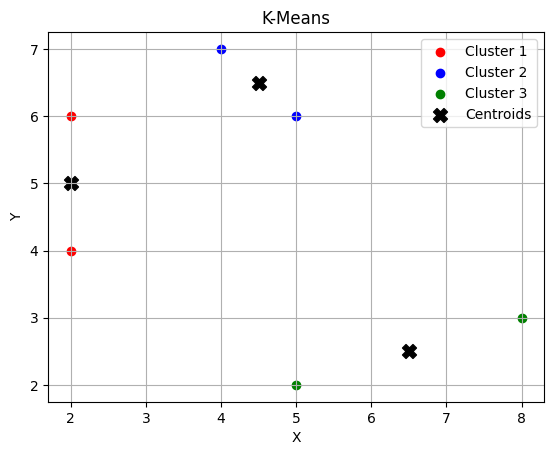

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, k, max_iters=100):
    centroids = np.array([[2, 4], [5, 6], [8, 3]])
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for p in X:
            clusters[np.argmin([np.linalg.norm(p - c) for c in centroids])].append(p)
        new_centroids = [np.mean(c, axis=0) if c else centroids[i] for i, c in enumerate(clusters)]
        if np.allclose(centroids, new_centroids): break
        centroids = np.array(new_centroids)
    return centroids, clusters

# Data and execution
X = np.array([[2, 4], [2, 6], [5, 6], [4, 7], [8, 3], [5, 2]])
centroids, clusters = k_means(X, 3)

# Output
print("Centroids:\n", centroids)
for i, c in enumerate(clusters):
    print(f"Cluster {i+1}: {len(c)} points: {c}")

# Plot
colors = ['r', 'b', 'g']
for i, c in enumerate(clusters):
    plt.scatter(*np.array(c).T, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(*centroids.T, c='k', marker='X', s=100, label='Centroids')
plt.legend(), plt.grid(True), plt.title('K-Means'), plt.xlabel('X'), plt.ylabel('Y')
plt.show()


In [4]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
df = pd.read_csv('Datasets/tennis.csv')
encoders={}
for col in df.columns:
    encoders[col]=LabelEncoder()
    df[col]=encoders[col].fit_transform(df[col])
x=df.drop(columns=["Play"])
y=df["Play"]
model=CategoricalNB()
model.fit(x,y)
y_pred=model.predict(x)
accuracy=accuracy_score(y,y_pred)
sample_dict = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
sample_df = pd.DataFrame([sample_dict])
for col in sample_df.columns:
        sample_df[col]=encoders[col].transform(sample_df[col])
predict=model.predict(sample_df)   
predict_label=encoders["Play"].inverse_transform(predict)[0]
probabilities=model.predict_proba(sample_df)[0]
print(f"Sample: {sample_dict}\n")
print(f"Posterior probability for 'Yes': {probabilities[1]:.3f}")
print(f"Posterior probability for 'No' : {probabilities[0]:.3f}")
print(f"\nPrediction: Play = {predict_label}")
print(f"\nTraining Accuracy: {accuracy * 100:.2f}%")

Sample: {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}

Posterior probability for 'Yes': 0.280
Posterior probability for 'No' : 0.720

Prediction: Play = No

Training Accuracy: 92.86%


### 8 puzzle

In [3]:
import heapq

goal = [[1,2,3],[4,5,6],[7,8,0]]
moves = [(-1,0),(1,0),(0,-1),(0,1)]

def h(state):
    return sum(abs((v-1)//3 - i) + abs((v-1)%3 - j)
               for i in range(3) for j in range(3) if (v := state[i][j]))

def neighbors(state):
    x, y = next((i,j) for i in range(3) for j in range(3) if state[i][j]==0)
    for dx,dy in moves:
        nx, ny = x+dx, y+dy
        if 0<=nx<3 and 0<=ny<3:
            new = [row[:] for row in state]
            new[x][y], new[nx][ny] = new[nx][ny], new[x][y]
            yield new

def astar(start):
    start_t = tuple(map(tuple, start))
    goal_t = tuple(map(tuple, goal))
    seen = {start_t: 0}
    pq = [(h(start), 0, start, [])]
    while pq:
        _, g, state, path = heapq.heappop(pq)
        state_t = tuple(map(tuple, state))
        if state_t == goal_t: return path + [state]
        for nb in neighbors(state):
            nb_t = tuple(map(tuple, nb))
            if nb_t not in seen or g+1 < seen[nb_t]:
                seen[nb_t] = g+1
                heapq.heappush(pq, (g+1 + h(nb), g+1, nb, path + [state]))
    return None

def print_path(path):
    for p in path:
        for r in p: print(r)
        print()

# Example
start = [[1,2,3],[0,4,6],[7,5,8]]
solution = astar(start)

if solution:
    print(f"Moves: {len(solution)-1}")
    print_path(solution)
else:
    print("No solution found (puzzle might be unsolvable).")


Moves: 3
[1, 2, 3]
[0, 4, 6]
[7, 5, 8]

[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load built-in Iris dataset
iris = datasets.load_iris()
X = iris.data  # features (4D)
y = iris.target  # labels (0, 1, 2)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on test data
accuracy = model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

# Classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # a known Setosa-like example
predicted_class = model.predict(new_sample)
print("Predicted class for new sample:", iris.target_names[predicted_class[0]])


Accuracy on test set: 1.0
Predicted class for new sample: setosa


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
# Load built-in Iris dataset
iris = datasets.load_iris()
X = iris.data  # features
y = iris.target  # labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an ANN (multi-layer perceptron) model
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

# Classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # example similar to class 'setosa'
predicted_class = model.predict(new_sample)
print("Predicted class for new sample:", iris.target_names[predicted_class[0]])


Accuracy on test set: 0.4
Predicted class for new sample: setosa


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv("Datasets/tennis.csv")

# Encode categorical features
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Split features and target
X = data.drop("Play", axis=1)
y = data["Play"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train SVM model
model = SVC(kernel='linear')  # or 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict a new sample (example: [Sunny, Cool, High, True] -> encoded)
sample = [[1, 1, 1, 2]]  # Use label encoding values
prediction = model.predict(sample)
print("Predicted:", "Yes" if prediction[0] == 1 else "No")


Accuracy: 0.6666666666666666
Predicted: Yes


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv("Datasets/tennis.csv")

# Label encode all categorical columns
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Features and target
X = data.drop("Play", axis=1)
y = data["Play"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ANN model
model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict new sample: e.g., [Sunny, Cool, High, True]
# Encoded sample: Sunny=2, Cool=1, High=0, True=1 → [2,1,0,1]
sample = [[2, 1, 0, 1]]
prediction = model.predict(sample)
print("Predicted:", "Yes" if prediction[0] == 1 else "No")
import warnings
warnings.filterwarnings("ignore")

Accuracy: 0.3333333333333333
Predicted: Yes


### SVM

In [18]:
from sklearn import svm
import numpy as np

X1 = np.array([[3,1],[3,-1],[6,1],[6,-1]])
X2 = np.array([[1,0],[0,1],[0,-1],[-1,0]])

X = np.vstack((X1, X2))
y = np.array([0]*len(X1) + [1]*len(X2))  # labels

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

predictions = clf.predict(X)

print("Data points and their predicted classes:")
for point, pred in zip(X, predictions):
    print(f"Point {point} => Predicted class: {pred}")
accuracy = np.mean(predictions == y)
print(f"\nTraining accuracy: {accuracy*100:.2f}%")

Data points and their predicted classes:
Point [3 1] => Predicted class: 0
Point [ 3 -1] => Predicted class: 0
Point [6 1] => Predicted class: 0
Point [ 6 -1] => Predicted class: 0
Point [1 0] => Predicted class: 1
Point [0 1] => Predicted class: 1
Point [ 0 -1] => Predicted class: 1
Point [-1  0] => Predicted class: 1

Training accuracy: 100.00%


Data points and their predicted classes:
Point [3 1] => Predicted class: 0
Point [ 3 -1] => Predicted class: 0
Point [6 1] => Predicted class: 0
Point [ 6 -1] => Predicted class: 0
Point [1 0] => Predicted class: 1
Point [0 1] => Predicted class: 1
Point [ 0 -1] => Predicted class: 1
Point [-1  0] => Predicted class: 1

Training accuracy: 100.00%


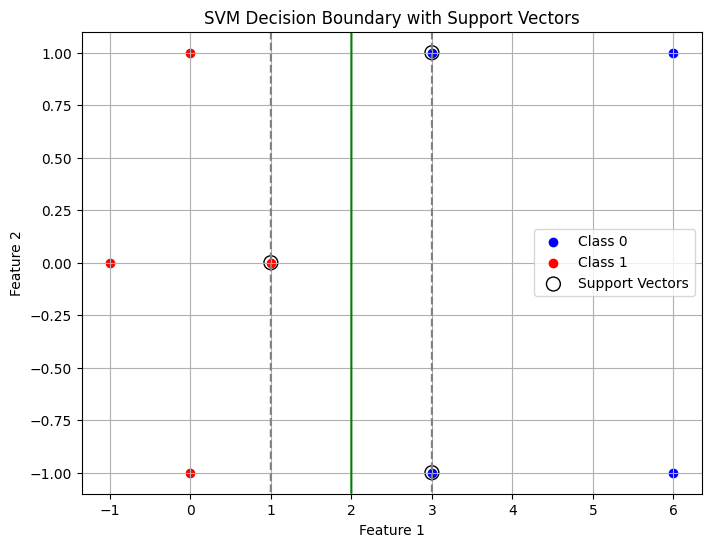

In [19]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Class 0 points
X_class0 =np.array([[3,1],[3,-1],[6,1],[6,-1]])


# Class 1 points
X_class1 = np.array([[1,0],[0,1],[0,-1],[-1,0]])

# Combine data
X = np.vstack((X_class0, X_class1))
y = np.array([0]*len(X_class0) + [1]*len(X_class1))

# Create and train SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Predict on training data
predictions = clf.predict(X)

# Print results
print("Data points and their predicted classes:")
for point, pred in zip(X, predictions):
    print(f"Point {point} => Predicted class: {pred}")

# Accuracy
accuracy = np.mean(predictions == y)
print(f"\nTraining accuracy: {accuracy*100:.2f}%")

# Plotting
plt.figure(figsize=(8, 6))

# Plot the points
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Class 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1])
yy = np.linspace(ylim[0], ylim[1])
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, levels=[0], linestyles=['-'], colors='green')
plt.contour(XX, YY, Z, levels=[-1, 1], linestyles=['--'], colors='gray')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Support Vectors")
plt.legend()
plt.grid(True)
plt.show()


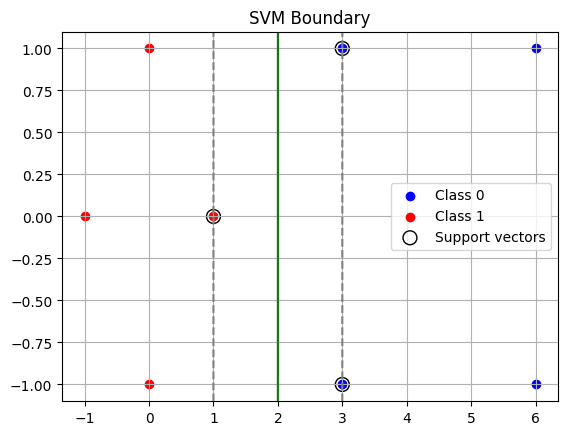

(Text(0.5, 1.0, 'SVM Boundary'),
 None,
 None)

In [8]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[3,1],[3,-1],[6,1],[6,-1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([0]*4 + [1]*4)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(*X[y==0].T, c='blue', label='Class 0')
plt.scatter(*X[y==1].T, c='red', label='Class 1')
plt.scatter(*clf.support_vectors_.T, s=100, facecolors='none', edgecolors='k',label='Support vectors')

ax = plt.gca()
xx, yy = np.meshgrid(np.linspace(*ax.get_xlim()), np.linspace(*ax.get_ylim()))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='green')
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles='--', colors='gray')

plt.title("SVM Boundary"), plt.legend(), plt.grid(True), plt.show()


### ANN

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("Datasets/tennis.csv")

# Label encode all categorical columns
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Features and target
X = data.drop("Play", axis=1)
y = data["Play"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ANN model
model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict new sample: e.g., [Sunny, Cool, High, True]
# Encoded sample: Sunny=2, Cool=1, High=0, True=1 → [2,1,0,1]
sample = [[2, 1, 0, 1]]
prediction = model.predict(sample)
print("Predicted:", "Yes" if prediction[0] == 1 else "No")

Accuracy: 0.3333333333333333
Predicted: Yes


C:\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
